In [1]:
import numpy as np
import pandas as pd
#get data from dataset
df = pd.read_csv("./week2.csv", header = None) 
print(df.head())

      0     1  2
0 -0.12 -0.48 -1
1 -0.93  0.86  1
2  0.93 -0.60  1
3  0.36 -0.86 -1
4  0.39  0.12  1


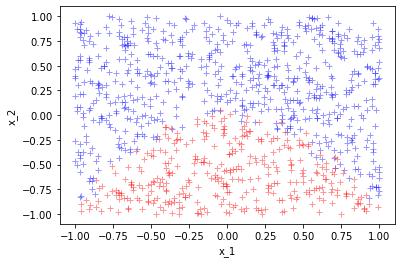

In [2]:
import matplotlib.pyplot as plt
x_true = df.loc[df.iloc[: , 2] == 1] #get the data which target value = 1
x_false = df.loc[df.iloc[: , 2] == -1] #get the data which target value = -1
#get feature_1 & feature_2 of the data which target value = 1
x1_true = x_true.iloc[: , 0]
x2_true = x_true.iloc[: , 1]
#get feature_1 & feature_2 of the data which target value = -1
x1_false = x_false.iloc[: , 0]
x2_false = x_false.iloc[: , 1]
'''
visualise the data
feature_1 -> x_label
feature_2 -> y_label
blue '+' -> target value = 1
red '+' -> target value = -1
'''
plt.figure ("pic")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot (x1_true, x2_true , 'b+' , alpha = 0.4)
plt.plot (x1_false, x2_false , 'r+' , alpha = 0.4)
plt.draw()

In [3]:
#split the dataset to training dataset and testing dataset
from __future__ import division
data = df.iloc[: , :3].values
#through adjust the divide num to adjust the ratio of training dataset and testing dataset
selection_train = [v for v in range(len(data)) if (v+1) % 1001 != 0] 
selection_test = [v for v in range(len(data)) if v % 1001 == 0]
#split the whole data to training data and testing data
data_train = data[selection_train , :]
data_test = data[selection_test , :]
#get the target value of the dataset
result_train = data_train[: , -1:]
result_test = data_test[: , -1:]
#get feature_1 & feature_2
data_train = data[selection_train , :2]
data_test = data[selection_test , :2]

In [4]:
'''
Train the LinearSVC model and print out the result of prediction. 
Print out the parameter values of the model.
'''
from sklearn.svm import LinearSVC
clf = LinearSVC(C = 100)
clf.fit(data_train , result_train)


'''
use the trained model predict the training data and print out the score through 
the function of the logistic regression model
'''
pre_train = clf.predict(data_train)
print(u'precision(training_dataset):%s'% clf.score(data_train, result_train))
#print the precision of the point which target value = -1
print(u'precision(training_dataset, target value = -1):%s'% (sum(pre_train[i] == -1 for i,v in enumerate(result_train) if v == -1) / sum(1 for i,v in enumerate(result_train) if v == -1)))
#print the precision of the point which target value = 1
print(u'precision(training_dataset, target value = 1):%s'% (sum(pre_train[i] == 1 for i,v in enumerate(result_train) if v == 1) / sum(1 for i,v in enumerate(result_train) if v == 1)))

'''
use the trained model predict the testing data and print out the score through 
the function of the logistic regression model
'''
pre_test = clf.predict(data_test)
#print(u'precision(testing_dataset):%s'% clf.score(data_test, result_test))
#print the precision of the point which target value = -1
#print(u'precision(testing_dataset, target value = -1):%s'% (sum(pre_test[i] == -1 for i,v in enumerate(result_test) if v == -1) / sum(1 for i,v in enumerate(result_test) if v == -1)))
#print the precision of the point which target value = 1
#print(u'precision(testing_dataset, target value = 1):%s'% (sum(pre_test[i] == 1 for i,v in enumerate(result_test) if v == 1) / sum(1 for i,v in enumerate(result_test) if v == 1)))
 
print(clf.coef_)#view the parameters of each variable of the best-fit line of the model
print(clf.intercept_)#view the intercept of the model

precision(training_dataset):0.8718718718718719
precision(training_dataset, target value = -1):0.7638483965014577
precision(training_dataset, target value = 1):0.9283536585365854
[[0.02659121 1.91231548]]
[0.74137047]


/Users/Marvin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Marvin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
'''
Draw the decision boundary through the parameter values w1&w2 and the intercept
'''
def plot_decision_boundary(model):
    x1 = np.linspace(-1, 1, 100)
    #Decision Boundary Function: w1*x1+w2*x2+intercept=0
    x2 =  -x1*model.coef_[0][0]/model.coef_[0][1] - model.intercept_[0]/model.coef_[0][1]
    plt.plot(x1, x2, c='g')

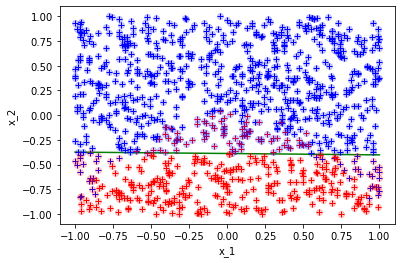

In [6]:
#Get the actual target values
df = pd.read_csv("./week2.csv", header = None)
x = df.loc[df.iloc[: , 2] == 1]
y = df.loc[df.iloc[: , 2] == -1]
x1 = x.iloc[: , 0]
x2 = x.iloc[: , 1]
y1 = y.iloc[: , 0]
y2 = y.iloc[: , 1]

#Get the prediction target values
df1 = pd.read_csv("./week2.csv", header = None)
df1[2] = pre_train #get the prediction result
x_true = df1.loc[df1.iloc[: , 2] == 1]
x_false = df1.loc[df1.iloc[: , 2] == -1]
x1_true = x_true.iloc[: , 0]
x2_true = x_true.iloc[: , 1]
x1_false = x_false.iloc[: , 0]
x2_false = x_false.iloc[: , 1]

plot_decision_boundary(clf) #draw the decision boundary
plt.xlabel("x_1")
plt.ylabel("x_2")
#draw the original data
plt.plot (x1, x2 , 'b+' , alpha = 1)
plt.plot (y1, y2 , 'r+' , alpha = 1)
#draw the prediction data
plt.plot(x1_true , x2_true , 'bo' , alpha = 0.2)
plt.plot(x1_false , x2_false , 'ro' , alpha = 0.2)
plt.show() 
